<a href="https://colab.research.google.com/github/Ruthmwaura/group_6_project/blob/main/Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Life Expectancy

##Defining the question

**a) Specifying the Data Analytic Question**


What variables are primarily responsible for the difference in life expectancy in different continents and regions?





**b) Defining the Metric for Success** 

Our success criteria will be pegged on our ability to determine the global life expectancy trend over the last decade between 2005 and 2015 in different continents and regions of the world. This will help provide insights to countries that have extremely low life expectancies on areas that need to be focused on to improve their life expectancy.


**c) Understanding the context**

Life expectancy is a statistical measure of the average time a human being is expected to live. It is based on the year of birth, the current age and other demographic factors such as sex, income composition and, mortality rates. The issue is not an emerging one and studies have been done on it that did not take into account a lot of factors that could have an impact on life expectancy. As a result, conclusions that were arrived at were inaccurate. The World Health Organization has improved upon their recent studies on the issue by incorporating not only the population demographic, but also immunization factors, mortality factors, economic factors, and social factors. The organization also provides data that has been collected over a number of years, and this allows for further analysis on the overall trend of life expectancy in a selected period of time. This project will look into those factors that affect the life expectancy of people in different countries in the world, find a comparison and give a recommendation on what measures a country should take in order to improve the life expectancy of its people.





**d) Recording the Experimental Design**

To successfully conduct this project the following steps will be taken in order:

  -Business understanding

  -Data understanding

  -Data preparation

  -descriptive analysis 
  
  -hypothesis testing

  -modelling 

  -Evaluation

  -Tableau visualizations

  
  **e) Data Relevance**

The data have variables that will adequately give answers to the analytical question.



## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from scipy import stats
from statsmodels.stats.weightstats import ztest as ztest
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import os
import warnings

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(30, 5)})
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Dataset Loading

In [3]:
# Mounting Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Accessing the working directory
#os.chdir('/content/drive/My Drive/Core/Moringa Core Project 1')

In [5]:
# Loading dataset
expectancy = pd.read_csv('Life Expectancy Data.csv')

## Dataset Preview

In [6]:
# First five rows
expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
# Tail section
expectancy.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [8]:
# Dataset information summary
expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

We have null value entries in some columns.

All columns are in the right data type.

**Missing Values**

In [9]:
# Missing values
expectancy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

From a survery of the available datasets, the missing values seem not to be present in the WorldBank and WHO datasets.

In [10]:
#previewing the number of columns and rows
print("The dataframe has "  +  str(expectancy.shape[1])   +   " columns and " + str(expectancy.shape[0])  +   " rows.")

The dataframe has 22 columns and 2938 rows.


In [11]:
#listing the columns
expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

##External Data Source Validation

1. The data was collected by the World Health Organization [Link](https://www.who.int/), a specialized agency of the United Nations responsible for international public health.
2. The data from WHO is mirrored by the data collected by the World Bank [Link](https://data.worldbank.org/), an international financial institution that provides loans and grants to the governments of low- and middle-income countries for the purpose of pursuing capital projects.

##Data Cleaning

###Validity

All columns are Relevant 

###Consistency

In [12]:
#checking for duplicates
expectancy.duplicated().any().any()

False

There were no duplicates

###Uniformity

In [13]:
#renaming columns for uniformity
#we will start by replacing the ' ' with '_'
expectancy.columns = expectancy.columns.astype(str).str.replace(" ", "_")
expectancy.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy_', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles_', '_BMI_', 'under-five_deaths_', 'Polio', 'Total_expenditure',
       'Diphtheria_', '_HIV/AIDS', 'GDP', 'Population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [14]:
#removing the unneccesary '_'
expectancy.rename(columns={'Life_expectancy_':'Life_expectancy','Measles_':'Measles','_BMI_':'BMI','Diphtheria_':'Diphtheria',
                   '_HIV/AIDS':'HIV/AIDS','_thinness__1-19_years':'thinness_1-19_years','_thinness_5-9_years':'thinness_5-9_years'},inplace=True)
expectancy.head()  

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [15]:
#changing all names to lowercase
expectancy.columns= expectancy.columns.str.lower()
expectancy.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


###Outliers

In [16]:
numerical_data= expectancy.select_dtypes(exclude='object')

Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

(numerical_data < (Q1 - 1.5 * IQR)) |(numerical_data > (Q3 + 1.5 * IQR))

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths_,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,False,False,False,True,False,False,False,True,False,True,True,False,False,False,False,True,True,True,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False
2,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False
3,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False
4,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2934,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False
2935,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2936,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


we have outliers, which will not be dropped

###Completeness

Temporary dataset

In [17]:
# Grouping by continent

# Loading dataset
continents = pd.read_html('https://github.com/dbouquin/IS_608/blob/master/NanosatDB_munging/Countries-Continents.csv')
continents = continents[0]
# Dataset preview
continents.head()

,Unnamed: 0,Continent,Country
0,NaN,Africa,Algeria
1,NaN,Africa,Angola
2,NaN,Africa,Benin
3,NaN,Africa,Botswana
4,NaN,Africa,Burkina


In [18]:
# Removing unnecessary column
continents.drop('Unnamed: 0', axis = 1, inplace = True)

In [19]:
# Confirming changes and checking information
continents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  194 non-null    object
 1   Country    194 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [20]:
# Copy of the dataset
hypothesis1 = expectancy.copy()

In [21]:
# 7 continents
continents.Continent.unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

In [22]:
# List of countries in each continent
africa = list(continents[continents['Continent'] == 'Africa']['Country'])
asia = list(continents[continents['Continent'] == 'Asia']['Country'])
europe = list(continents[continents['Continent'] == 'Europe']['Country'])
oceania = list(continents[continents['Continent'] == 'Oceania']['Country'])
north_america = list(continents[continents['Continent'] == 'North America']['Country'])
south_america = list(continents[continents['Continent'] == 'South America']['Country'])
continents = [africa, asia, europe, oceania, north_america, south_america]

In [23]:
# Adding a continent column
hypothesis1['continent'] = ''

In [24]:
# Target list
conts = ['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America']

In [25]:
# Assigning continent to each family
def Continents(continents, source, target, list, data):
  for i, continent in enumerate(continents):
    data.loc[(data[source].apply(lambda x: x in continent)), [target]]= list[i]

In [26]:
# Function call
Continents(continents, 'country', 'continent', conts, hypothesis1)

In [27]:
# Confirming changes
hypothesis1['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', ''], dtype=object)

In [28]:
# Checking error
hypothesis1[hypothesis1['continent'].isnull()]['country'].unique()

array([], dtype=object)

In [29]:
# Renaming country columns
hypothesis1['country'].replace({'Bolivia (Plurinational State of)': 'Bolivia',
                               'Brunei Darussalam': 'Brunei', 
                               "Democratic People's Republic of Korea": 'North Korea',
                               'Iran (Islamic Republic of)': 'Iran',
                               "Lao People's Democratic Republic": 'Laos',
                               'Micronesia (Federated States of)': 'Micronesia',
                               'Republic of Korea': 'South Korea', 'Republic of Moldova':
                               'Maldova', 'Syrian Arab Republic': 'Syria',
                               'The former Yugoslav republic of Macedonia': 'North Macedonia',
                              'United Kingdom of Great Britain and Northern Ireland':
                               'United Kingdom', 'United Republic of Tanzania': 'Tanzania',
                               'Venezuela (Bolivarian Republic of)':'Venezuela',
                               'Viet Nam': 'Vietnam'}, inplace = True)

In [30]:
# Variables used to assign continents
africa2 = ['Burkina Faso', 'Côte d\'Ivoire', 'Cabo Verde', 'Democratic Republic of the Congo', 'Tanzania' ]
asia2 = ['Brunei', 'North Korea', 'Laos', 'Myanmar', 'South Korea', 'Timor-Leste', 'Vietnam', 'Iran', 'Syria']
europe2 = ['Czechia', 'Maldova', 'North Macedonia', 'United Kingdom']
north_america2 = ['United States of America']
south_america2 = ['Bolivia', 'Venezuela']
oceania2 = ['Cook Islands', 'Micronesia', 'Niue']
continents2 = [africa2, asia2, europe2, oceania2, north_america2, south_america2]

In [31]:
# Implementaion
# Function call
Continents(continents2, 'country', 'continent', conts, hypothesis1)

In [32]:
# Confirmimg changes
hypothesis1['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [33]:
# Confirmimg changes
hypothesis1[hypothesis1['continent'].isnull()].any().any()

False

In [34]:
hypothesis1.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths_', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'continent'],
      dtype='object')

**Clusters**

The selected continents for the study are North America, Europe, Asia and Africa.

In [35]:
# Selecting required continents
clusters = ['North America', 'Europe', 'Asia', 'Africa']
hypothesis1 = hypothesis1.loc[(hypothesis1['continent'].apply(lambda x: x in clusters))]

In [36]:
# Checking missing values
hypothesis1.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      4
adult_mortality                      4
infant_deaths                        0
alcohol                            172
percentage_expenditure               0
hepatitis_b                        532
measles                              0
bmi                                 34
under-five_deaths_                   0
polio                               19
total_expenditure                  204
diphtheria                          19
hiv/aids                             0
gdp                                397
population                         584
thinness_1-19_years                 34
thinness_5-9_years                  34
income_composition_of_resources    162
schooling                          161
continent                            0
dtype: int64

In [37]:
# The population and GDP cannot be imputed as they differ per country
hypothesis1.drop(['hepatitis_b','gdp','population'], axis = 1, inplace = True)

In [38]:
# Grouped mean by country
means = hypothesis1.groupby('country').mean()
# Reseting the index to obtain the country column
means.reset_index(inplace = True)

In [39]:
# Null values in the means data frame
means.isnull().sum()

country                             0
year                                0
life_expectancy                     4
adult_mortality                     4
infant_deaths                       0
alcohol                             1
percentage_expenditure              0
measles                             0
bmi                                 4
under-five_deaths_                  0
polio                               0
total_expenditure                   2
diphtheria                          0
hiv/aids                            0
thinness_1-19_years                 4
thinness_5-9_years                  4
income_composition_of_resources    12
schooling                          11
dtype: int64

In [40]:
# Columns
cols = list(hypothesis1.columns)
columns = [cols[3], cols[4], cols[6], cols[8], cols[10], cols[12], cols[13],
           cols[14], cols[16], cols[17], cols[18], cols[19]]


In [41]:
# Imputing mean
for column in columns:
  countries = list(hypothesis1[hypothesis1[column].isnull()].country.unique())
  for country in countries:
    # hypothesis1.loc[(hypothesis1.Alcohol.isnull()) & (hypothesis1.Country == country)] = means.loc[means.Country == country, 'Alcohol'].at[means.index[-1]]
    hypothesis1.loc[(hypothesis1[column].isnull()) & (hypothesis1.country == country), column] = means.loc[means.country == country, column].values[0]

In [42]:
# Checking changes
hypothesis1.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      4
adult_mortality                      4
infant_deaths                        0
alcohol                             16
percentage_expenditure               0
measles                              0
bmi                                 34
under-five_deaths_                   0
polio                               19
total_expenditure                   32
diphtheria                           0
hiv/aids                             0
thinness_1-19_years                 34
thinness_5-9_years                  34
income_composition_of_resources    162
schooling                          161
continent                            0
dtype: int64

In [43]:
# Percentage of missing values
percentage = hypothesis1.isnull().sum() * 100 / len(hypothesis1)
percentage

country                            0.000000
year                               0.000000
status                             0.000000
life_expectancy                    0.155039
adult_mortality                    0.155039
infant_deaths                      0.000000
alcohol                            0.620155
percentage_expenditure             0.000000
measles                            0.000000
bmi                                1.317829
under-five_deaths_                 0.000000
polio                              0.736434
total_expenditure                  1.240310
diphtheria                         0.000000
hiv/aids                           0.000000
thinness_1-19_years                1.317829
thinness_5-9_years                 1.317829
income_composition_of_resources    6.279070
schooling                          6.240310
continent                          0.000000
dtype: float64

In [44]:
# Grouped mean by continent
means2 = hypothesis1.groupby('continent').mean()
# Reseting the index to obtain the country column
means2.reset_index(inplace = True)

In [45]:
# There are no missing values
means2.isnull().sum()

continent                          0
year                               0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
measles                            0
bmi                                0
under-five_deaths_                 0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
thinness_1-19_years                0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [46]:
# Checking changes
means2.head()

,continent,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,bmi,under-five_deaths_,polio,total_expenditure,diphtheria,hiv/aids,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Africa,2007.500000,58.611921,266.571759,44.246528,2.652050,108.679071,4102.025463,23.172356,67.796296,71.017585,5.338465,69.743056,5.425347,7.258173,7.186779,0.462597,9.211625
1,Asia,2007.500000,70.831818,138.511364,65.217330,2.060353,472.252479,4536.762784,33.027699,83.892045,85.900285,4.680442,86.074472,0.162216,7.675284,7.931960,0.637988,11.744196
2,Europe,2007.516320,77.365625,95.227679,0.888724,9.053339,1981.092616,471.762611,52.245685,1.068249,92.758982,7.173950,92.135015,0.110386,1.616369,1.626488,0.796380,14.946080
3,North America,2007.532544,73.778869,126.119048,5.621302,6.084657,536.289184,17.363905,45.005030,6.872781,85.500000,6.762690,87.624260,0.465089,2.817456,2.777219,0.657140,12.430745


In [47]:
# Filling by continent means
for column in columns:
  continents = list(hypothesis1[hypothesis1[column].isnull()].continent.unique())
  for continent in continents:
    # hypothesis1.loc[(hypothesis1.Alcohol.isnull()) & (hypothesis1.Country == country)] = means.loc[means.Country == country, 'Alcohol'].at[means.index[-1]]
    hypothesis1.loc[((hypothesis1[column].isnull()) & (hypothesis1.continent == continent)), column] = means2.loc[means2.continent == continent, column].values[0]

In [48]:
# Checking changes
hypothesis1.isnull().sum()

country                             0
year                                0
status                              0
life_expectancy                     0
adult_mortality                     0
infant_deaths                       0
alcohol                             0
percentage_expenditure              0
measles                             0
bmi                                34
under-five_deaths_                  0
polio                              19
total_expenditure                   0
diphtheria                          0
hiv/aids                            0
thinness_1-19_years                34
thinness_5-9_years                  0
income_composition_of_resources     0
schooling                           0
continent                           0
dtype: int64

In [49]:
# Checking errors
hypothesis1[hypothesis1['bmi'].isnull()].head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,bmi,under-five_deaths_,polio,total_expenditure,diphtheria,hiv/aids,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,continent
1715,Monaco,2013,Developing,77.365625,95.227679,0,0.01000,0.000000,0,NaN,0,99.0,4.30,99.0,0.1,NaN,1.626488,0.79638,14.94608,Europe
2216,San Marino,2013,Developing,77.365625,95.227679,0,0.01000,0.000000,0,NaN,0,69.0,6.50,69.0,0.1,NaN,1.626488,0.79638,15.10000,Europe
2409,South Sudan,2015,Developing,57.300000,332.000000,26,2.65205,0.000000,878,NaN,39,41.0,2.71,31.0,3.4,NaN,7.186779,0.42100,4.90000,Africa
2410,South Sudan,2014,Developing,56.600000,343.000000,26,2.65205,46.074469,441,NaN,39,44.0,2.74,39.0,3.5,NaN,7.186779,0.42100,4.90000,Africa
2411,South Sudan,2013,Developing,56.400000,345.000000,26,2.65205,47.444530,525,NaN,40,5.0,2.62,45.0,3.6,NaN,7.186779,0.41700,4.90000,Africa


In [50]:
hypothesis1.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'measles', 'bmi',
       'under-five_deaths_', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'thinness_1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling', 'continent'],
      dtype='object')

In [51]:
# Retrying
targets_columns = ['bmi', 'polio', 'thinness_1-19_years'] 
# Filling by continent means
for column in targets_columns:
  continents = list(hypothesis1[hypothesis1[column].isnull()].continent.unique())
  for continent in continents:
    # hypothesis1.loc[(hypothesis1.Alcohol.isnull()) & (hypothesis1.Country == country)] = means.loc[means.Country == country, 'Alcohol'].at[means.index[-1]]
    hypothesis1.loc[((hypothesis1[column].isnull()) & (hypothesis1.continent == continent)), column] = means2.loc[means2.continent == continent, column].values[0]

In [52]:
# Confirming changes
hypothesis1.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
measles                            0
bmi                                0
under-five_deaths_                 0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
thinness_1-19_years                0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
continent                          0
dtype: int64

In [53]:
# Convert to csv
hypothesis1.to_csv('Life_Expectancy_clean.csv')
!cp Life_Expectancy_clean.csv "drive/My Drive/"

##Analysis

###Univariate analysis

*   We explore variables one by one
*   We have univariate analysis graphical and non graphical
*   Method to perform univariate analysis will depend on whether the variable is categorical or numerical

##### **1.categorical variables**

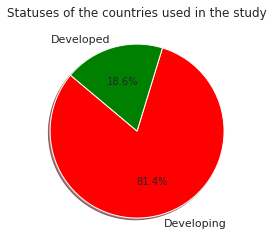

In [54]:
 # pie chart showing status of countries used
x = hypothesis1['status'].value_counts()
labels = ['Developing', 'Developed']
colors = ['red', 'green']
explode = [0, 0]
plt.pie(x, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Statuses of the countries used in the study')
plt.show()

dataset consist of 83.7% developing countries and 16.3% developed countries

In [55]:
# number of countries per continent
hypothesis1['continent'].value_counts()

Africa           864
Asia             704
Europe           674
North America    338
Name: continent, dtype: int64

the leading continent is Africa, followed by Europe and the least is Oceana

Text(0.5, 1.0, 'Frequency of continents used')

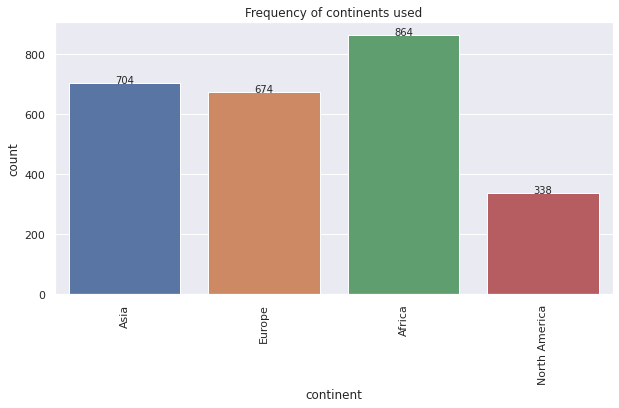

In [56]:
# visualization of number of countries per continent
fig, ax1 = plt.subplots(figsize = (10,5))
graph = sns.countplot(ax = ax1, x = 'continent', data = hypothesis1)
graph.set_xticklabels(graph.get_xticklabels(), rotation = 90)
for p in graph.patches:
  height = p.get_height()
  graph.text(p.get_x() + p.get_width()/2., height + 0.1, height, ha='center')

plt.title('Frequency of continents used')

Africa is the leading with frequency of 784 and Oceana is the least with 148 countries

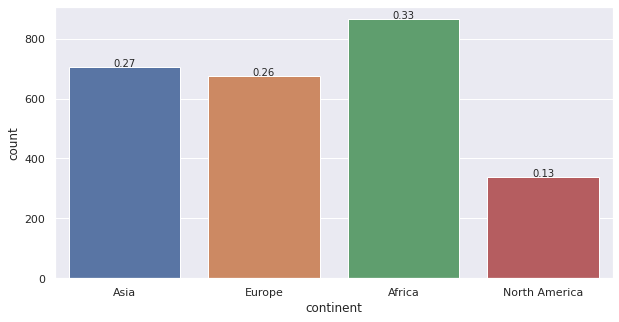

In [57]:
# percentage of countries per continent
plt.figure(figsize = [10,5])
total = float(len(hypothesis1))

ax = sns.countplot(x='continent', data = hypothesis1)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha = 'center')

plt.show()

sample taken every year for the research were equal(183) except for 2013 which was 193

##### **2.continuous variables**

In [58]:
# statistical description
hypothesis1.describe(exclude = 'object')

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,bmi,under-five_deaths_,polio,total_expenditure,diphtheria,hiv/aids,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,2007.508527,68.832554,168.465773,33.581783,4.612568,753.056833,2737.158140,36.316941,46.774806,82.655639,5.824999,82.391639,1.950891,5.316354,5.359857,0.623140,11.822484
std,4.612171,9.895390,129.303348,125.372014,4.148196,2026.068577,12197.046527,19.625858,170.563069,23.603473,2.447679,23.831298,5.383916,4.486396,4.574718,0.210081,3.313872
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,0.300000,0.200000,0.000000,0.000000
25%,2004.000000,62.000000,73.000000,0.000000,0.800000,4.114320,0.000000,18.700000,1.000000,77.000000,4.200000,78.000000,0.100000,1.900000,1.900000,0.476750,9.700000
50%,2008.000000,72.000000,142.000000,3.000000,3.502667,61.668537,27.500000,36.000000,4.000000,93.000000,5.639000,93.000000,0.100000,3.850000,3.900000,0.665000,12.200000
75%,2012.000000,75.800000,241.000000,25.250000,8.012500,424.456736,526.750000,55.300000,36.000000,97.000000,7.400000,97.000000,1.025000,7.500000,7.500000,0.786000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,212183.000000,71.400000,2500.000000,99.000000,17.600000,99.000000,50.600000,27.700000,28.600000,0.948000,19.200000


*   Mean life expectancy is 69.2, maximum life expectancy is 89.0 while the minimum is 36.3
*  Mean adult mortality rate is 164.9, of under 5 yrs is 42.0 and that of infants is 30.3

In [59]:
# skewness along the index axis
hypothesis1.skew(axis = 0, skipna = True)

year                              -0.002919
life_expectancy                   -0.566165
adult_mortality                    1.128396
infant_deaths                      9.198800
alcohol                            0.609374
percentage_expenditure             4.615054
measles                            8.858078
bmi                               -0.099454
under-five_deaths_                 8.919516
polio                             -2.073453
total_expenditure                  0.609179
diphtheria                        -2.027661
hiv/aids                           5.042817
thinness_1-19_years                1.599325
thinness_5-9_years                 1.669584
income_composition_of_resources   -1.031299
schooling                         -0.632286
dtype: float64

From this, we can see that adult mortlity, infant deaths, alcohol, percentage expenditure, measles, under five deaths, total expenditure, HIV/AIDS,GDP, population,thinness 1-19 and 5-9, are positively skewed (12 variables)

The rest are negatively skewed(8 variables)

Text(0.5, 1.0, 'Samples taken for every year(2000 - 2015)')

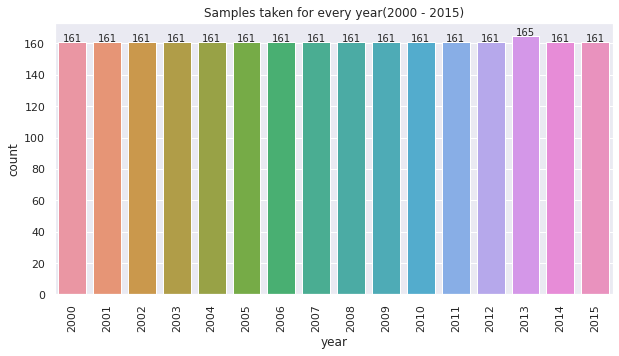

In [60]:
# samples yearly
fig, ax1 = plt.subplots(figsize = (10,5))
graph = sns.countplot(ax = ax1, x = 'year', data = hypothesis1)
graph.set_xticklabels(graph.get_xticklabels(), rotation = 90)
for p in graph.patches:
  height = p.get_height()
  graph.text(p.get_x() + p.get_width()/2., height + 0.1, height, ha='center')

plt.title('Samples taken for every year(2000 - 2015)')

The samples used for the study are equal, except for 2013, but still on the same rande

In [61]:
def histogram(data, column):
  hypothesis1[column].plot.hist()

In [62]:
# histogram(hypothesis1, 'gdp')
# plt.xlabel('GDP')
# plt.title('Frequency of GDP values')

In [63]:
# hypothesis1['gdp'].mean()

frequency decreases with increase in the value of the GDP

most values lie around the mean

Text(0.5, 1.0, 'Frequency of Life expectancy values')

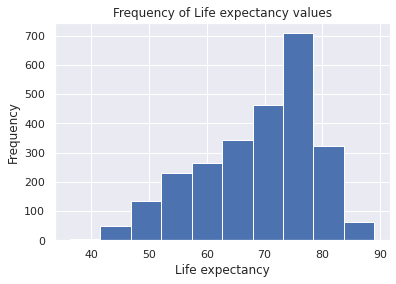

In [64]:
histogram(hypothesis1, 'life_expectancy')
plt.xlabel('Life expectancy')
plt.title('Frequency of Life expectancy values')

In [65]:
hypothesis1['life_expectancy'].mode()

0    73.0
dtype: float64

The frequency of values of Life expectancy increases with increase in life expectentacy until the the peak value of Life expectancy(about 75), then the life expectancy drops

In [66]:
# function to plot distplots
def dist_plots(data, column):
  plt.figure(figsize = [8, 5])
  sns.distplot(data[column], kde =True)

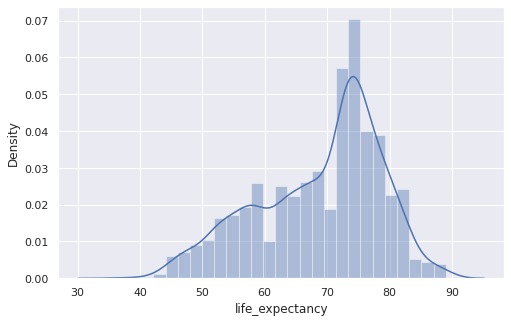

In [67]:
# life expectancy
dist_plots(hypothesis1, 'life_expectancy')

Most countries in the target continents have a life expectancy of approximately 73

In [68]:
# check 
hypothesis1['life_expectancy'].mode()

0    73.0
dtype: float64

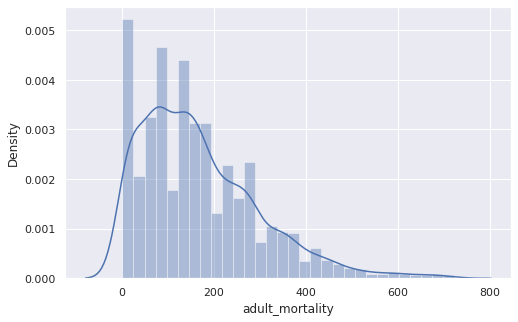

In [69]:
# Adult Mortality
dist_plots(hypothesis1, 'adult_mortality')

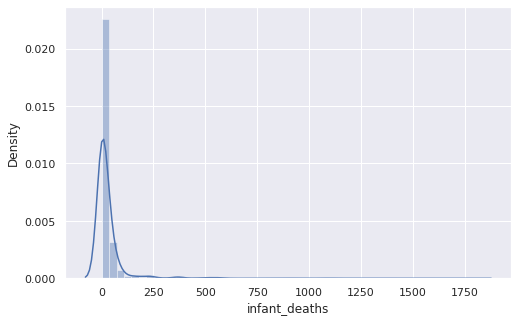

In [70]:
# infant deaths
dist_plots(hypothesis1, 'infant_deaths')

The frequency of infant deaths decreases with decrease in the value of infant deaths

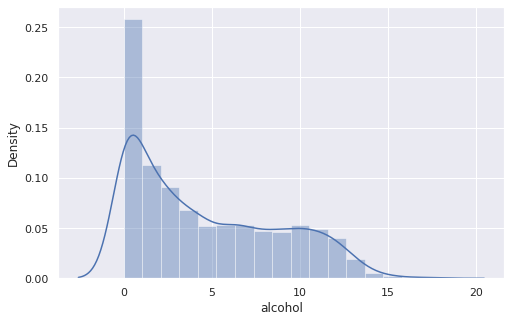

In [71]:
# Alcohol
dist_plots(hypothesis1, 'alcohol')

In [72]:
# # GDP
# dist_plots(hypothesis1, 'gdp')

The frequency of GDP values decreases as the GDP increases

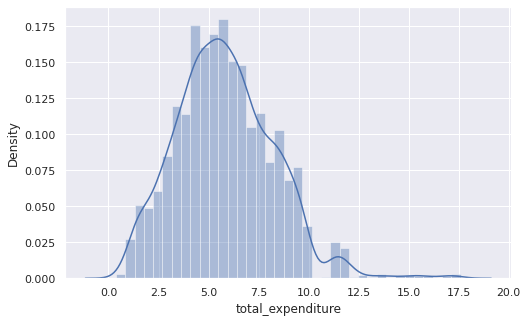

In [73]:
# Total expenditure
dist_plots(hypothesis1, 'total_expenditure')

In [74]:
hypothesis1.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'measles', 'bmi',
       'under-five_deaths_', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'thinness_1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling', 'continent'],
      dtype='object')

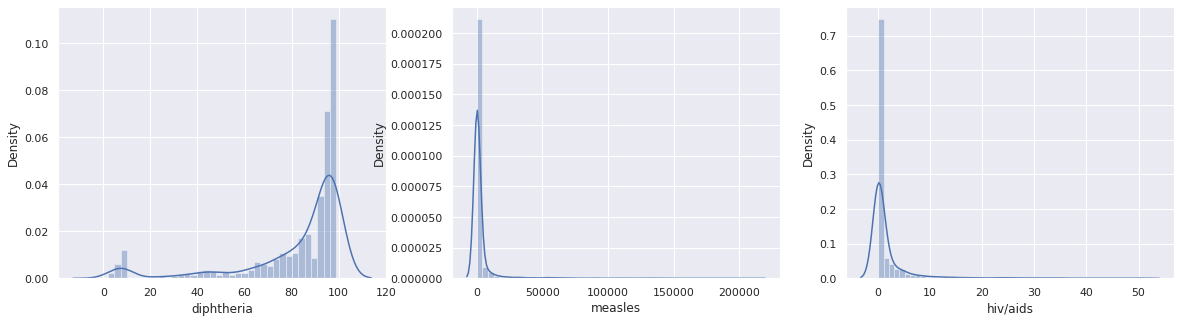

In [75]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))
# sns.distplot(hypothesis1['Hepatitis B'], ax = axes[0,0])
sns.distplot(hypothesis1['diphtheria'], ax = axes[0])
sns.distplot(hypothesis1['measles'], ax = axes[1])
sns.distplot(hypothesis1['hiv/aids'], ax = axes[2])

For diptheria,most values fall between approximately 85-95 occcur the most.

This is opposite to that of HIV/AIDS and measles where most values fall approximately bettwen 0-5

In [76]:
# function to plot area
def area(data, column):
  data[column].value_counts().sort_index().plot.area()

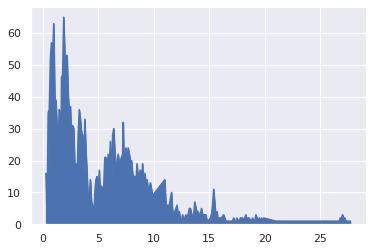

In [77]:
# thinness  1-19 years
area(hypothesis1, 'thinness_1-19_years')

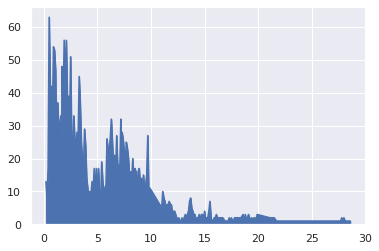

In [78]:
# thinness 5-9 years
area(hypothesis1, 'thinness_5-9_years')

For thinness between 5-9 and 1-19, values between 0-4 occur more frequently, and and the frequency decreases as the thinness increases(value)

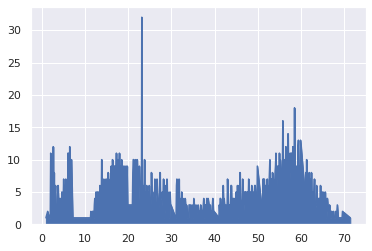

In [79]:
# BMI
area(hypothesis1, 'bmi')

### Bivariate Analysis

#### **1.Categorical-Categorical**

In [80]:
# Function used to generate a crosstab before plotting a stacked bar chart.
def CrosstabPlot(x, y, data):  
  table = pd.crosstab(data[x], data[y])
  table.plot.bar(stacked = True, figsize = (30,5), color = ['g', 'b'])
  plt.title(f'{x} Vs {y}', y = 1.05, fontsize = 12)
  plt.xticks(rotation = 0)
  plt.xlabel(x, fontsize = 10)
  plt.ylabel(y, fontsize = 10)

In [81]:
# Categoical columns
categorical = list(expectancy.select_dtypes(include = 'object').columns)
categorical

['country', 'status']

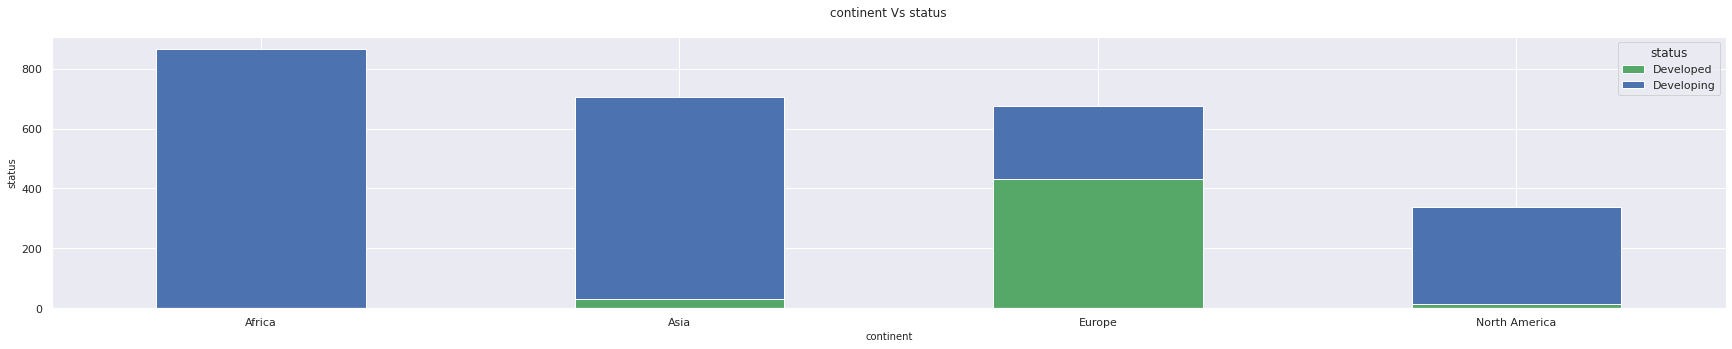

In [82]:
# Continent Vs Status
CrosstabPlot('continent', 'status', hypothesis1)

* Africa is a purely developing continent.
* Europe has the highest number of developed countires.

#### **2.Numerical-Numerical**

In [83]:
# Numerical-numerical plots
def LineScatterPlots(x, y, data):
  fig, ax = plt.subplots(figsize = (15, 5))
  # sns.scatterplot(data[x], data[y], ax = ax[0], color = 'green')
  # ax[0].set_title(f'Scatter Plot: {x} - {y}', y = 1.05)
  sns.lineplot(data[x], data[y], color = 'green', marker='o', ci=None)
  plt.title(f'Line Plot: {x} - {y}', y = 1.05)
  plt.show()

In [84]:
# Pearson Correlation
def Corr(x,y,data):
  corr = data[[x,y]].corr()
  print(f'Correlation Matrix : \n{corr}')

In [85]:
# Numeric columns
numeric = list(hypothesis1.select_dtypes(exclude = 'object').columns)
numeric

['year',
 'life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'measles',
 'bmi',
 'under-five_deaths_',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv/aids',
 'thinness_1-19_years',
 'thinness_5-9_years',
 'income_composition_of_resources',
 'schooling']

**Annual Life Expectancy**

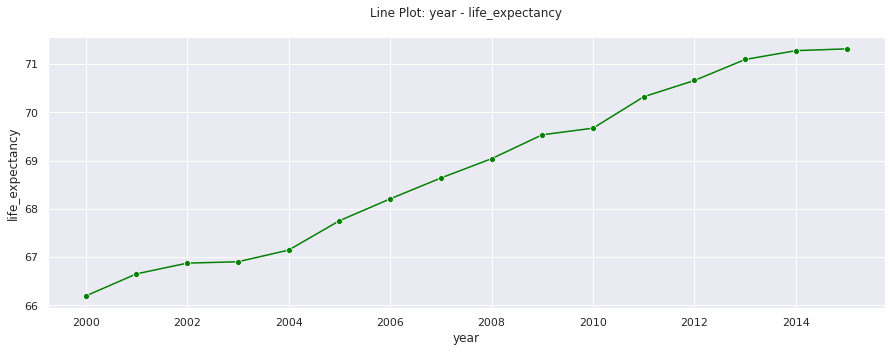

In [86]:
# Life expectancy Vs Year
LineScatterPlots(numeric[0], numeric[1], hypothesis1)

There is a steady increse in life expectancy increases progressively each year.

In [87]:
# Correlation
Corr(numeric[0], numeric[1], hypothesis1)

Correlation Matrix : 
                     year  life_expectancy
year             1.000000         0.173749
life_expectancy  0.173749         1.000000


There is a very week positve correlation between the year and life expectancy variables.

**Mortality**

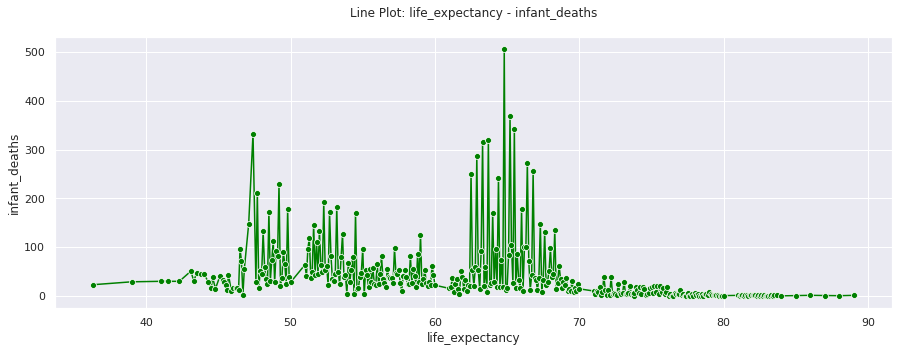

In [88]:
# Life Expectancy Vs Infant Deaths
LineScatterPlots(numeric[1], numeric[3], hypothesis1)

There seems to be no linear relationship between the number of infant deaths and the life expectancy.

In [89]:
# Correlation
Corr(numeric[1], numeric[3], hypothesis1)

Correlation Matrix : 
                 life_expectancy  infant_deaths
life_expectancy         1.000000      -0.193897
infant_deaths          -0.193897       1.000000


The observation made above is confirmed as the correlation between the number of infant deaths and the life expectancy is negative but weak.

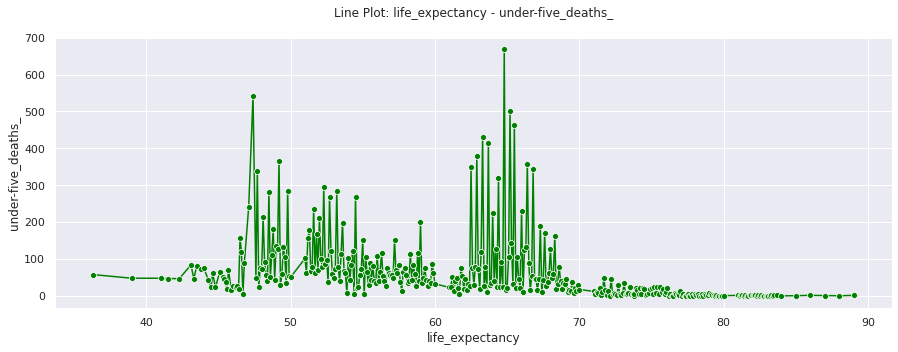

In [90]:
# Life Expectancy Vs Under Five Deaths
LineScatterPlots(numeric[1], numeric[8], hypothesis1)

There seem to be a slight negative linear relationship between the deaths of children under the age of five, and the life expectancy.

In [91]:
# Correlation
Corr(numeric[1], numeric[8], hypothesis1)

Correlation Matrix : 
                    life_expectancy  under-five_deaths_
life_expectancy             1.00000            -0.21999
under-five_deaths_         -0.21999             1.00000


The correlation between the deaths of children under the age of five and the life expectancy is negtive and weak.

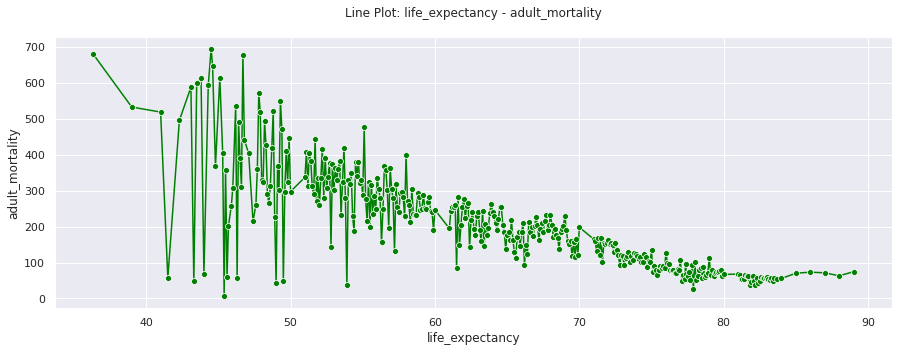

In [92]:
# Life Expectancy Vs Adult Mortality
LineScatterPlots(numeric[1], numeric[2], hypothesis1)

Overall, adult mortality decrease with subsequent increase in life expectancy.

In [93]:
# Correlation
Corr(numeric[1], numeric[2], hypothesis1)

Correlation Matrix : 
                 life_expectancy  adult_mortality
life_expectancy         1.000000        -0.701742
adult_mortality        -0.701742         1.000000


There is strong negative correlation between the audult mortality and life expectancy.

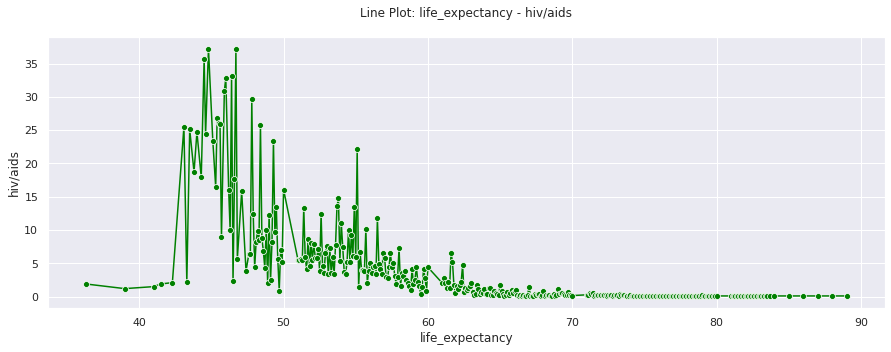

In [94]:
# Life Expectancy Vs HIV/AIDS
LineScatterPlots(numeric[1], numeric[12], hypothesis1)

The linear relationship between the number of HIV/AIDS deaths per 1, 000 live births  (0-4 years) and the life expectancy is negative.

In [95]:
# Correlation
Corr(numeric[1], numeric[12], hypothesis1)

Correlation Matrix : 
                 life_expectancy  hiv/aids
life_expectancy         1.000000 -0.559369
hiv/aids               -0.559369  1.000000


The correlation between the HIV/AIDS deaths and the life expectancy is moderate and negative.

**Lifestyle**

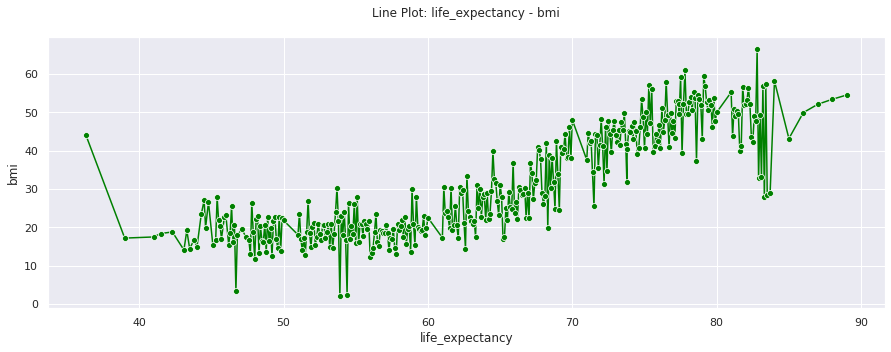

In [96]:
# Life Expectancy Vs BMI
LineScatterPlots(numeric[1], numeric[7], hypothesis1)

There seems to be a positive linear relationship between the BMI and life expectancy.

In [97]:
# Correlation
Corr(numeric[1], numeric[7], hypothesis1)

Correlation Matrix : 
                 life_expectancy       bmi
life_expectancy         1.000000  0.592548
bmi                     0.592548  1.000000


More accurately, there is a moderate posite correlation between the BMI and life expectancy varaibles.

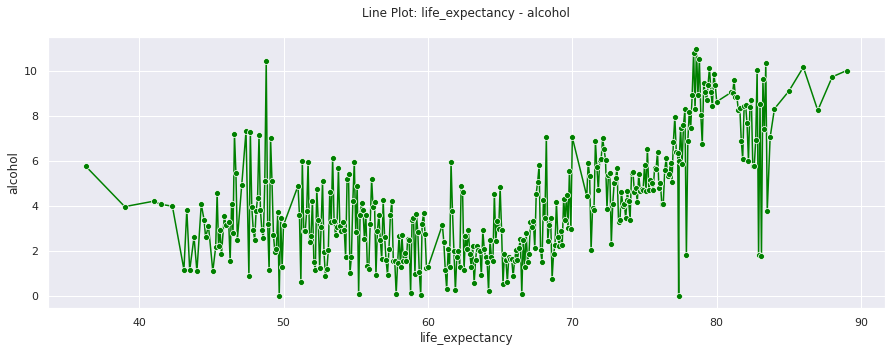

In [98]:
# Life Expectancy Vs Alcohol
LineScatterPlots(numeric[1], numeric[4], hypothesis1)

There seems to be a positive linear relation between the life expectancy and the rate of alcohol consumption.

In [99]:
# Correlation
Corr(numeric[1], numeric[4], hypothesis1)

Correlation Matrix : 
                 life_expectancy   alcohol
life_expectancy         1.000000  0.399439
alcohol                 0.399439  1.000000


There is a very weak positive correlation between the life expectancy and alcohol variables.

**Nutrition**

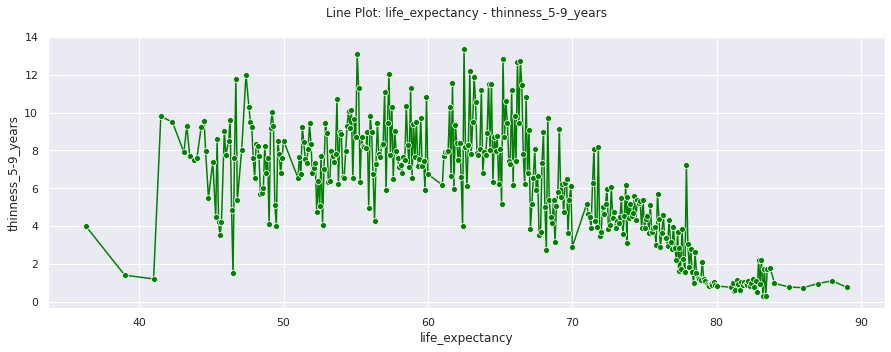

In [100]:
# Life Expectancy Vs Thinness (5-9 years)
LineScatterPlots(numeric[1], numeric[14], hypothesis1)

The linear relationship between the thinness in children from the age of 5-9 years and the life expectany is negative.

In [101]:
# Correlation
Corr(numeric[1], numeric[14], hypothesis1)

Correlation Matrix : 
                    life_expectancy  thinness_5-9_years
life_expectancy            1.000000           -0.468044
thinness_5-9_years        -0.468044            1.000000


The correlation between the thinness in children of 5-9 years and the life expectancy is moderate and negative.

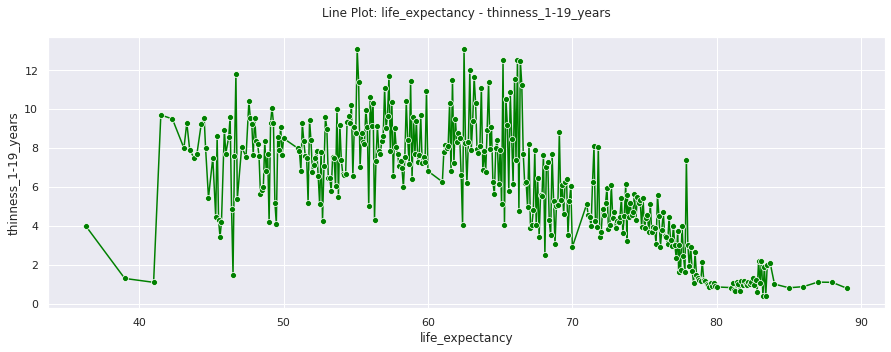

In [102]:
# Life Expectancy Vs Thinness 1-19 years
LineScatterPlots(numeric[1], numeric[13], hypothesis1)

There is a negative linear relationship between the prevalence of thinness among children and adolescents for Age 10 to 19, and the life expectancy.

In [103]:
# Correlation
Corr(numeric[1], numeric[13], hypothesis1)

Correlation Matrix : 
                     life_expectancy  thinness_1-19_years
life_expectancy             1.000000            -0.474239
thinness_1-19_years        -0.474239             1.000000


The correlation between the thinness (1-19 years) and the life expectancy is neagative and moderate.

**Immunization**

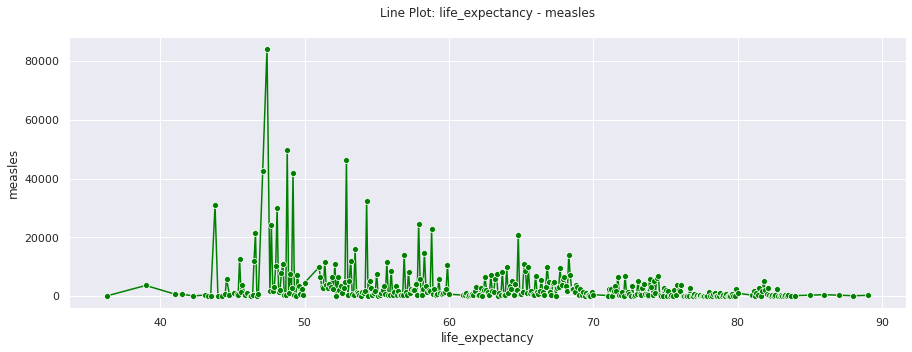

In [104]:
# Life Expectancy Vs Measles
LineScatterPlots(numeric[1], numeric[6], hypothesis1)

There seems to be no linear relationship between the immunization rate of measles, and the life expectancy.

In [105]:
# Correlation
Corr(numeric[1], numeric[6], hypothesis1)

Correlation Matrix : 
                 life_expectancy   measles
life_expectancy         1.000000 -0.152239
measles                -0.152239  1.000000


There is a weak correlation between measles immunization rates and life expectany.

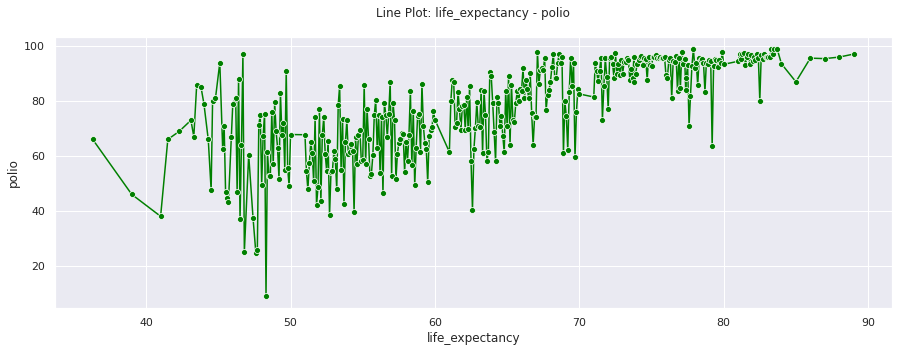

In [106]:
# Life Expectancy Vs Polio
LineScatterPlots(numeric[1], numeric[9], hypothesis1)

There is a positive linear relationship between the Poilio immunization rates and the life expectancy.

In [107]:
# Correlation
Corr(numeric[1], numeric[9], hypothesis1)

Correlation Matrix : 
                 life_expectancy     polio
life_expectancy         1.000000  0.494256
polio                   0.494256  1.000000


The correlatin between the Polio immunization rates and the life expectancy is positive and moderate.

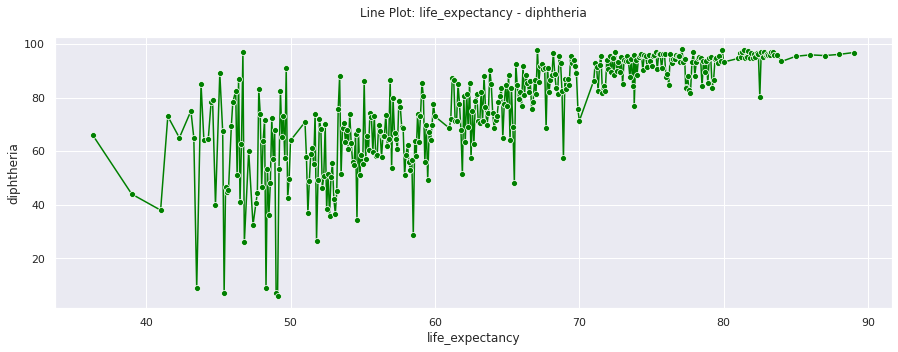

In [108]:
# Life Expectancy Vs Diptheria
LineScatterPlots(numeric[1], numeric[11], hypothesis1)

The linear relationship between the Diptheria immunization rates and the life expectancy is positive.

In [109]:
# Correlation
Corr(numeric[1], numeric[11], hypothesis1)

Correlation Matrix : 
                 life_expectancy  diphtheria
life_expectancy          1.00000     0.52095
diphtheria               0.52095     1.00000


The correlation between Diptheria immunization rates and the life expectancy is moderate and positive.

**Financial situation**

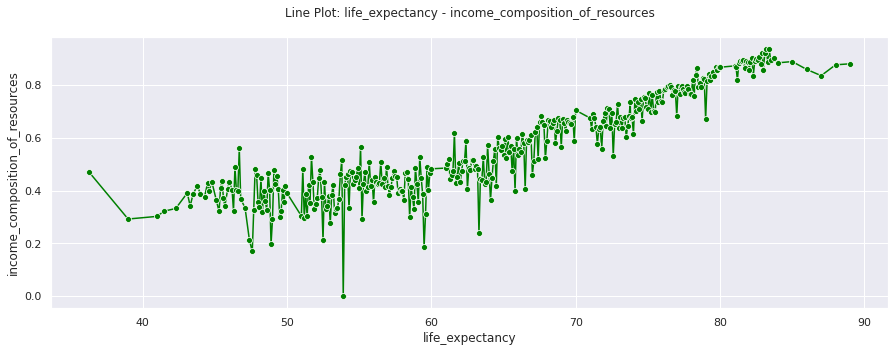

In [110]:
# Life Expectancy Vs Income Composition of Resources
LineScatterPlots(numeric[1], numeric[15], hypothesis1)

The life expectancy increases with increase in the income composition of resources.

In [111]:
# Correlation
Corr(numeric[1], numeric[15], hypothesis1)

Correlation Matrix : 
                                 life_expectancy  \
life_expectancy                         1.000000   
income_composition_of_resources         0.731774   

                                 income_composition_of_resources  
life_expectancy                                         0.731774  
income_composition_of_resources                         1.000000  


The correltion between the income and the life expectancy is strong and positive.

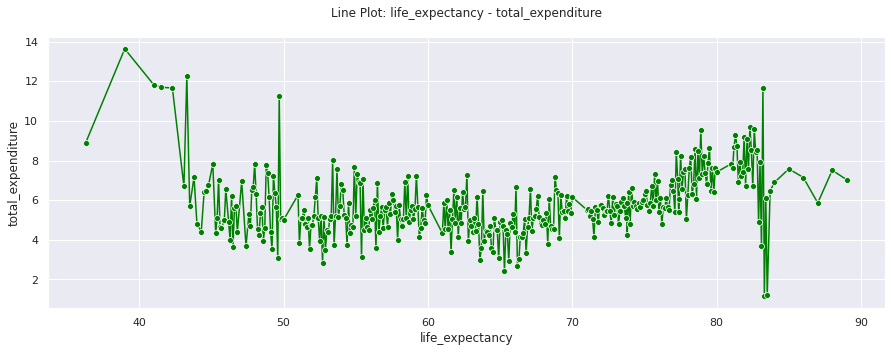

In [112]:
# Life Expectancy Vs Total expenditure
LineScatterPlots(numeric[1], numeric[10], hypothesis1)

In [113]:
# Correlation
Corr(numeric[1], numeric[10], hypothesis1)

Correlation Matrix : 
                   life_expectancy  total_expenditure
life_expectancy           1.000000           0.220621
total_expenditure         0.220621           1.000000


There is a weak negative correlation between the total expenditure on health of each counrey and the life expectancy.

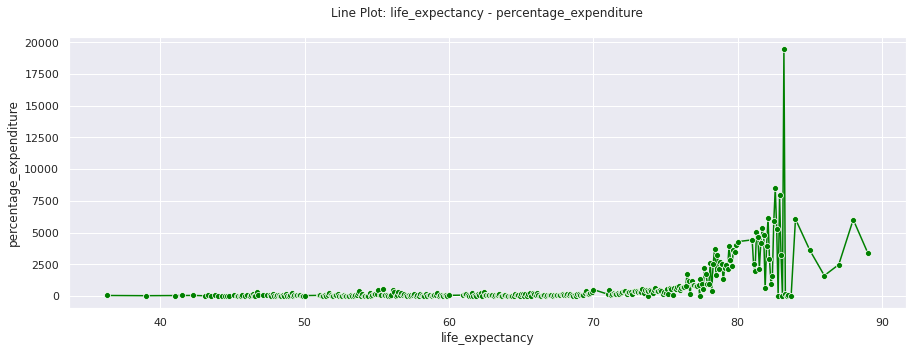

In [114]:
# Life Expectancy Vs Percentage Expenditure
LineScatterPlots(numeric[1], numeric[5], hypothesis1)

The percentage expenditure on health seems to have a positive linear relation to the life expectancy when the life expectancy is between 75 and 90.

In [115]:
# Correlation
Corr(numeric[1], numeric[5], hypothesis1)

Correlation Matrix : 
                        life_expectancy  percentage_expenditure
life_expectancy                  1.0000                  0.3831
percentage_expenditure           0.3831                  1.0000


There is a weak postive correlation between the percentage expenditure and the life expectancy.

**Education**

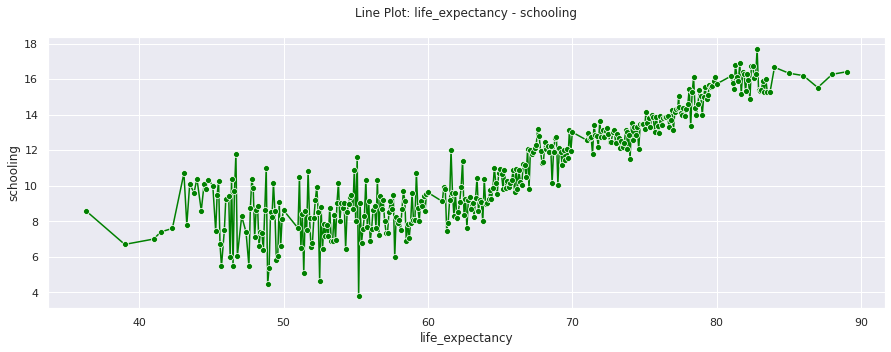

In [116]:
# Life Expectancy Vs Schooling
LineScatterPlots(numeric[1], numeric[16], hypothesis1)

The life expectancy increases with increase in the number of years in school.

In [117]:
# Correlation
Corr(numeric[1], numeric[16], hypothesis1)

Correlation Matrix : 
                 life_expectancy  schooling
life_expectancy         1.000000   0.748527
schooling               0.748527   1.000000


There is a strong positive correlation between schooling and life expectancy.

#### **3.Numeric-Categorical**

In [118]:
# Bar plot function
def BarPlotBiv(x,y, data):
  fig, ax = plt.subplots(figsize = (8,5))
  sns.barplot(data[x], data[y], palette = 'viridis')
  plt.title(f'{x} Distribution by {y}'
  , fontsize = 12, y = 1.05)
  plt.show()

**Life Expectancy**

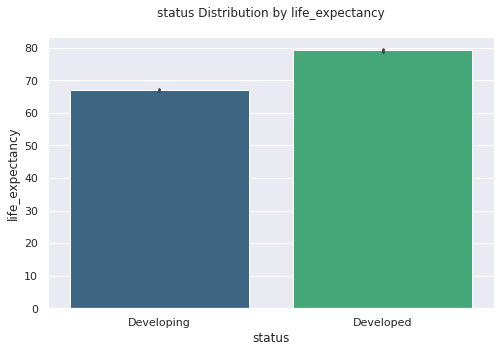

In [119]:
# Life expectancy Vs Status
BarPlotBiv(categorical[1], numeric[1], expectancy)

As expected, developed countries have the highest life expectancy.

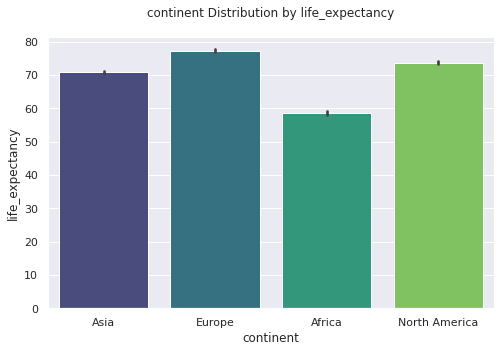

In [120]:
# Continent Vs Life Expectancy
BarPlotBiv('continent',numeric[1], hypothesis1)

Europe has the highets life expectancy, followed by North America, Asia, and lastly Africa.

**Mortality**

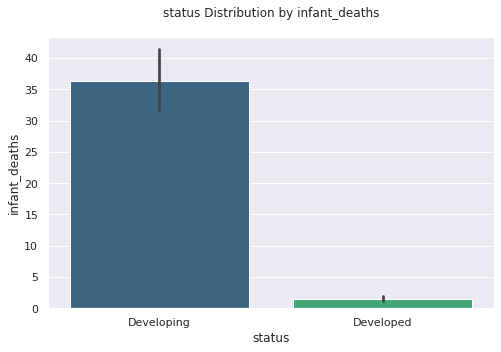

In [121]:
# Status Vs Infant Deaths
BarPlotBiv(categorical[1], numeric[3], expectancy)

Developing countries have the highest number of infant deaths.

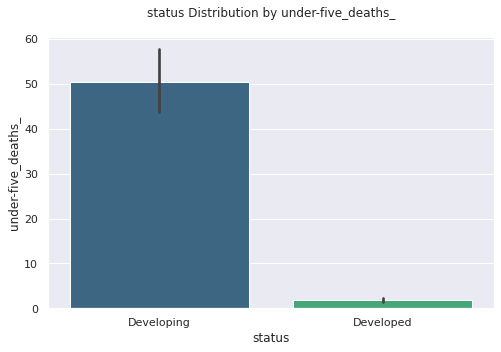

In [122]:
# Status Vs Under 5 Deaths
BarPlotBiv(categorical[1], numeric[8], expectancy)

Developing countries have the highest deaths of children under the age of 5.

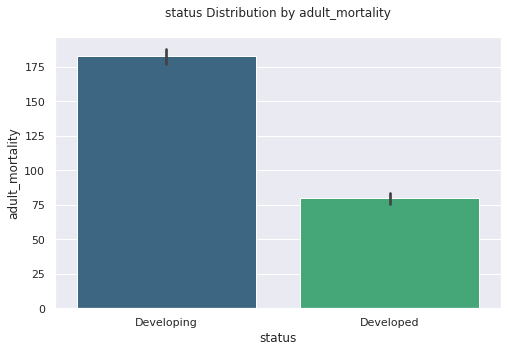

In [123]:
# Status Vs Adult Mortality
BarPlotBiv(categorical[1], numeric[2], expectancy)

Developing countries have the highest adult mortality.

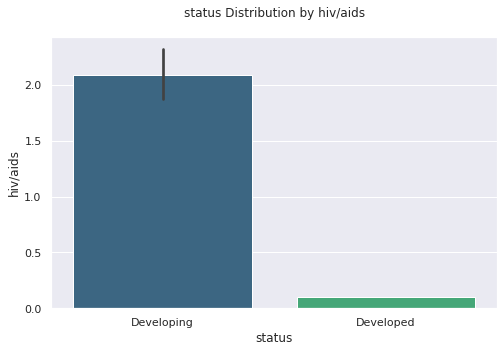

In [124]:
# Status Vs HIV/AIDS
BarPlotBiv(categorical[1], numeric[12], expectancy)

Developing countries have the highest deaths per 1 000 live births HIV/AIDS (0-4 years).

**Lifestyle**

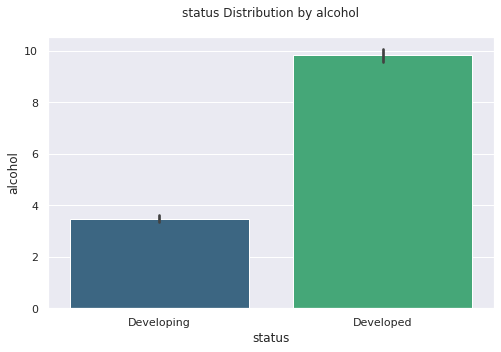

In [125]:
# Status Vs Alcohol
BarPlotBiv(categorical[1], numeric[4], expectancy)

Developed countries have the highest alcohol consumed, recorded per capita (15+) consumption (in litres of pure alcohol).

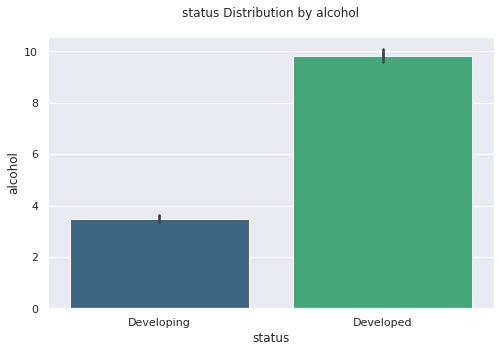

In [126]:
# Status Vs BMI
BarPlotBiv(categorical[1], numeric[4], expectancy)

Developed countries have the highest average body mass index for the entire population.

**Nutrition**

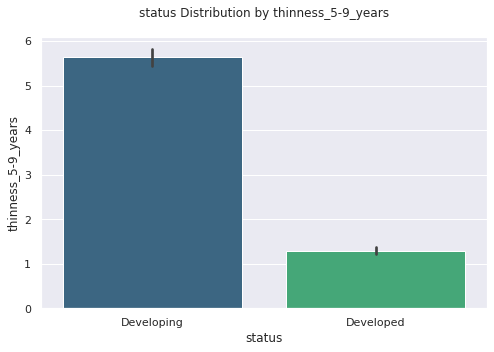

In [127]:
# Status Vs Thinness (5-9) years
BarPlotBiv(categorical[1], numeric[14], expectancy)

Developing countires have the highest prevalence of thinness anomg children.

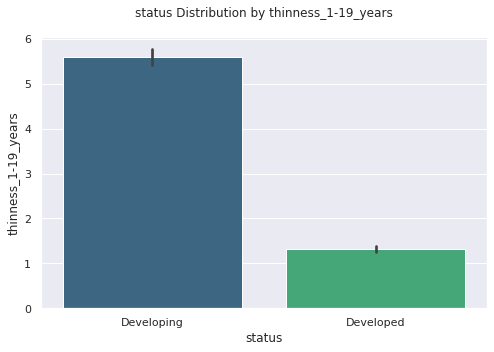

In [128]:
# Status Vs Thinness (1-19) years
BarPlotBiv(categorical[1], numeric[13], expectancy)

Developing countires have the highest prevalence of thinness among children and adolescents for Age 10 to 19.

**Immunization**

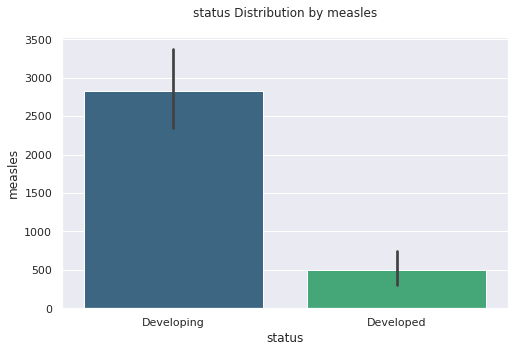

In [129]:
# Status Vs Measles
BarPlotBiv(categorical[1], numeric[6], expectancy)

Developing countries have the highest immunization rates for Measles.

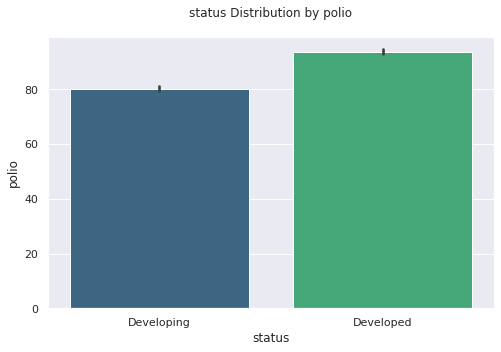

In [130]:
# Status Vs Polio
BarPlotBiv(categorical[1], numeric[9], expectancy)

Developed countries have the highest Polio immunization rates.

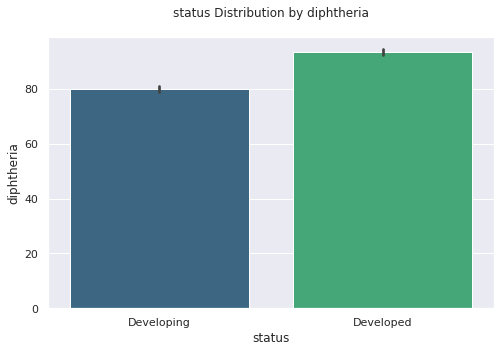

In [131]:
# Life expectancy Vs Diptheria
BarPlotBiv(categorical[1], numeric[11], expectancy)

Developed countries have the highest Diptheria immunization rates.

**Financial Position**

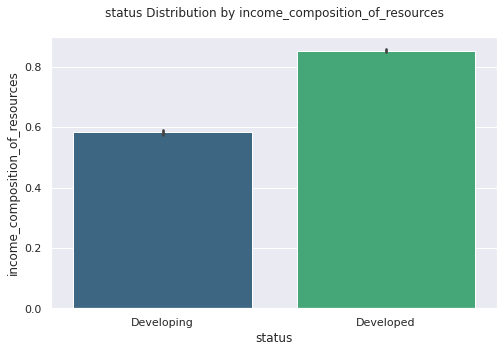

In [132]:
# Status Vs Income composition of resources
BarPlotBiv(categorical[1], numeric[15], expectancy)

Developed countries have higher income composition of resources.

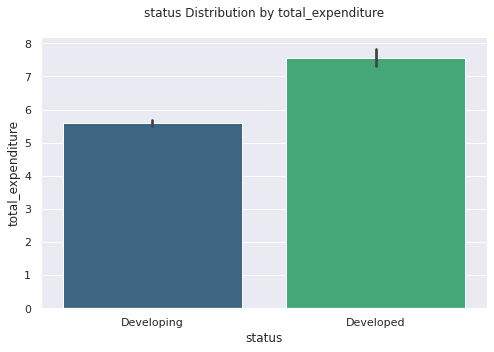

In [133]:
# Status Vs Total Expenditure
BarPlotBiv(categorical[1], numeric[10], expectancy)

Developed countries have a higher expenditure on health.

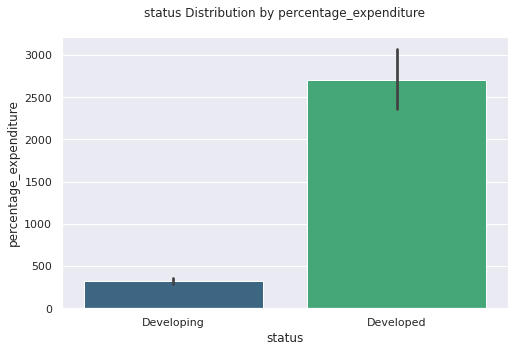

In [134]:
# Status Vs Percentage Expenditure
BarPlotBiv(categorical[1], numeric[5], expectancy)

Developed countries have the highest percentage expenditure on health.

**Education**

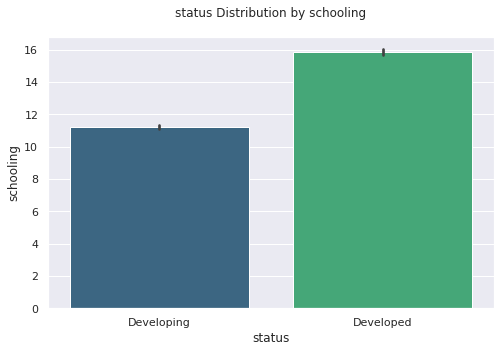

In [135]:
# Status Vs Schooling
BarPlotBiv(categorical[1], numeric[16], expectancy)

Developed countries have highest amount of time spent by individuals in school.

####**Hypothesis Testing**

**i) Hypotheses:**

a) North America Vs Europe
1. **Null**: North America and Europe have the same mean/median life expectancy.
2. **Alternate**: North America and Europe do not have the same mean/median life expectancy.

b) East Africa West, South and North Africa
1. **Null**: East Africa and West/South/North have the same mean/median life expectancy.
2. **Alternate**: East Africa and West/South/North do not have the same mean/median life expectancy

**ii) Acceptance criteria and test sensitivity:**

Significance level = 0.05

This significance level will ensure a fair trade off between the Type 1 and Type 2 error, as the probablility of getting type 2 errors decreases with increase in the significance level, but this leads to an increase in the probability of getting a type 1 error.

**iii) Hypothesis Test**

*1. Parametric Test*

In [136]:
# Normality test
# Visual test function

from scipy import stats
def NormalityTest(data1, data2, column): 

  # Length equalization to prevent broadcast errors

  # Checking sample lengths
  one = len(data1)
  two = len(data2)
  
  # Equalize length
  if one > two:
    data1 = data1.iloc[range(two)]
  elif one < two:
    data2 = data2.iloc[range(one)]
  else:
    pass

  # Residuals 
  diff = data1.values - data2.values  

  # Probalility plot 
  stats.probplot(diff, plot= plt)
  plt.title(f'{column} Q-Q Plot')
  plt.show()

  # Histogram 
  diff = pd.Series(diff)
  title = f'{column} Residuals'
  diff.plot(kind= "hist", title= title)
  plt.xlabel(column) 
  plt.show()

  # Shapiro Normality Test
  test_statistic, p_value = stats.shapiro(diff)
  print(f"Test statistic = {test_statistic}")
  print(f"P-Value = {p_value}")

The sample has n > 30. Therefore, only the independent Z-test will be considered.

**Independent Z-Test**

Conditions:
* The sample size is greater than 30. 
* Data points should be independent from each other. 
* Normal distribution of data.
* Random selection of data.
* Equal sample sizes.

In [137]:
# Z-Test Function
def ZTest(data1, data2):

  # Length Equalization
  one = len(data1)
  two = len(data2)
  
  # Equalize length
  if one > two:
    data1 = data1.iloc[range(two)]
  elif one < two:
    data2 = data2.iloc[range(one)]
  else:
    pass

  # Z-Test
  test_statistic, p_value = ztest(data1, data2, value = 0)
  print(f'Test Statistic = {test_statistic} \nP-Value = {p_value}')

**Europe Vs North America**

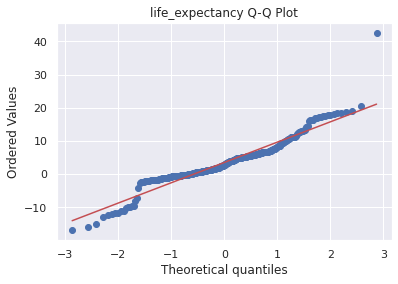

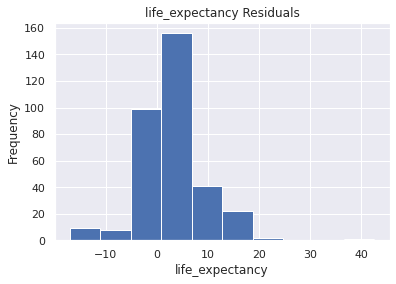

Test statistic = 0.9200581312179565
P-Value = 1.9193316640880864e-12


In [138]:
# Independent Samples
europe = hypothesis1[hypothesis1['continent'] == 'Europe']['life_expectancy']
north_america = hypothesis1[hypothesis1['continent'] == 'North America']['life_expectancy']

# Normality Test
NormalityTest(europe, north_america, numeric[1])

The p-value is less than 0.05, therefore, there is sufficient evidence to reject the null hypothesis if normality.

*2. Non-Parametric Test*

**a) Mann Whitney U Test**

**Null Hypotheisis:**  the distribution underlying sample x is the same as the distribution underlying sample y.

Conditions:
* The dependent variable should be measured on an ordinal scale or a continuous scale.
* The independent variable should be two independent, categorical groups.
* Observations should be independent. 
* Observations are not normally distributed. However, they should follow the same shape (i.e. both are bell-shaped and skewed left).

In [139]:
# Hypothesis Test
def mannwhitney(data1, data2):
  one = len(data1)
  two = len(data2)

  # Equalize length
  if one > two:
    data1 = data1.iloc[range(two)]
  elif one < two:
    data2 = data2.iloc[range(one)]
  else:
    pass

  # Mann Whitney U Test
  return stats.mannwhitneyu(data1, data2)

**b) Mood Median Test**

**Null hypothesis:** two or more samples come from populations with the same median.

* Data should include only one categorical factor.
* The dependent variable is continuous or discrete-count, and the independent variables are discrete with two or more attributes.
* Sample data need not be normally distributed.
* Sample sizes can be unequal too.

In [140]:
# Hypothesis Test
def moodmedian(data1, data2):
  one = len(data1)
  two = len(data2)

  # Equalize length
  if one > two:
    data1 = data1.iloc[range(two)]
  elif one < two:
    data2 = data2.iloc[range(one)]
  else:
    pass

  # Mood Median Test
  test_statistic, p_value, grand_median, cont_table = stats.median_test(data1, data2)
  print(f'test_statistic = {test_statistic}\np_value = {p_value}\ngrand_median = {grand_median}\ncont_table = \n{cont_table}')

**Europe Vs North America**

In [141]:
mannwhitney(europe, north_america)

MannwhitneyuResult(statistic=33490.5, pvalue=6.4729136969724515e-21)

From the Mann Whitney U test, the p-value < 0.05, therefore, there is sufficient evidence to reject the null hypothesis of similar distribution of the life expectancy variable. 

In [142]:
moodmedian(europe, north_america)

test_statistic = 59.17211557819735
p_value = 1.444665541700793e-14
grand_median = 75.2
cont_table = 
[[219 118]
 [119 220]]


The result is confirmed by the Mood Median test as the p-value < 0.05, therefore, there is sufficient evidence to reject the null hypothesis of equal life expectancy median.

**African Regions**

In [143]:
# African regions lists
north = 'Algeria, Egypt, Libya, Morocco, Sudan, Tunisia, Western Sahara'
west = 'Benin, Burkina Faso, Cabo Verde, The Gambia, Ghana, Guinea, Guinea-Bissau, Ivory Coast, Liberia, Mali, Mauritania, Niger, Nigeria, Senegal, Sierra Leone,Togo'
central = ' Angola, Burundi, Cameroon, the Central African Republic, Chad, the Democratic Republic of the Congo, the Republic of the Congo, Equatorial Guinea, Gabon, Rwanda, Sao Tome and Principe'
east = 'Tanzania, Kenya, Uganda, Rwanda, Burundi, South Sudan, Djibouti, Eritrea, Ethiopia, Somalia, Comoros, Mauritius, Seychelles, Mozambique, Madagascar, Malawi'
south = 'Angola, Botswana, Lesotho, Mozambique, Namibia, South Africa, Swaziland, Zambia, Zimbabwe'

# List of regions
regions = [north, west, central, east, south]

# Convert strings to list
def ToList(regions):
  for region in regions:
    region = region.split(',')

In [144]:
# Function call
ToList(regions)

# Checking changes
regions[0]

'Algeria, Egypt, Libya, Morocco, Sudan, Tunisia, Western Sahara'

In [145]:
# Dataset copy to incorporate regions
africa = hypothesis1[hypothesis1['continent'] == 'Africa']

# Adding an empty region column
africa['region'] = ''

# Region Names
names = ['North', 'West', 'Central', 'East', 'South']
# Function call
Continents(regions, 'country', 'region', names, africa)

In [146]:
# Confirming changes
africa['region'].unique()

array(['North', 'South', 'West', 'East', '', 'Central'], dtype=object)

In [147]:
# Target samples
north = africa[africa['region'] == 'North'][numeric[1]]
west = africa[africa['region'] == 'West'][numeric[1]]
central = africa[africa['region'] == 'Central'][numeric[1]]
east= africa[africa['region'] == 'East'][numeric[1]]
south = africa[africa['region'] == 'South'][numeric[1]]

**1. East Africa Vs West Africa**

*Parametric test*

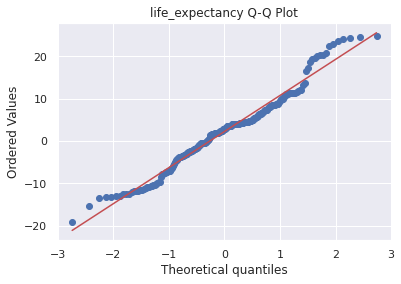

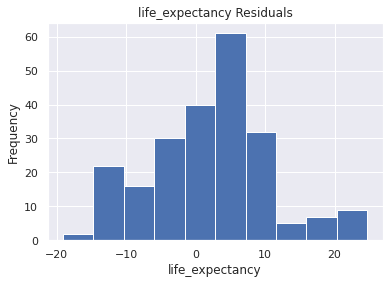

Test statistic = 0.9737257361412048
P-Value = 0.00034959096228703856


In [148]:
# Test for East and West Africa
# Normality Test
NormalityTest(east, west, numeric[1])

The p-value < 0.05, therefore, there is enough evidence to reject the null hypothesis of normal distribution.

Non-parametric tests will be implemented.

*Non-Parametric Test*

In [149]:
# Mann Whitney U Test
mannwhitney(east, west)

MannwhitneyuResult(statistic=20325.0, pvalue=0.00025455473559847107)

The p-value < 0.05, therefore, there is sufficient evidence to reject the null hypothesis of similar distribution between East and West Africa.

In [150]:
# Mood Median Test
moodmedian(east, west)

test_statistic = 12.224188790560472
p_value = 0.0004717390017656591
grand_median = 58.5
cont_table = 
[[130  92]
 [ 94 132]]


The p-value < 0.05, therefore, there is sufficient evidence to reject the null hypothesis of equal population median between East and West Africa.

**2. East Africa Vs North Africa**

*Parametric Test*

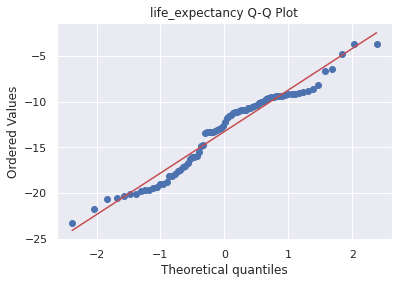

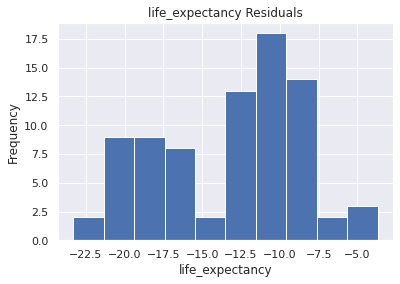

Test statistic = 0.9551237225532532
P-Value = 0.006849807221442461


In [151]:
# Normality Test
NormalityTest(east, north, numeric[1])

* The P-Value < 0.05, therefore, there is suffucient evidence to reject the null hypothesis of normal distribution.
* Therefore, the non-parametric tests will be implemented.

*Non-Parametric Test*

In [152]:
# Mann Whitney U Test
mannwhitney(east, north)

MannwhitneyuResult(statistic=6.0, pvalue=5.838672930570889e-28)

The p-value << 0.05, therefore, there is sufficient evidence to reject the null hypothesis of similar distribution between East and North Africa.

In [153]:
# Mood Median Test
moodmedian(east, north)

test_statistic = 140.71294559099437
p_value = 1.8591385277500295e-32
grand_median = 68.6
cont_table = 
[[ 1 77]
 [79  3]]


The p-value << 0.05, therefore, there is sufficient evidence to reject the null hypothesis of equal mean life expectancy in East and North Africa.

**3. East Vs Cental Africa**

*Parametric Test*

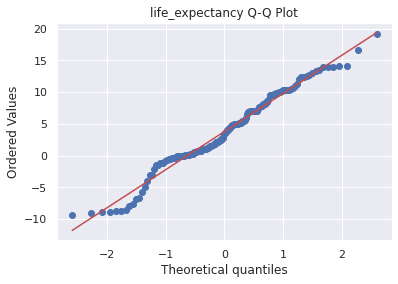

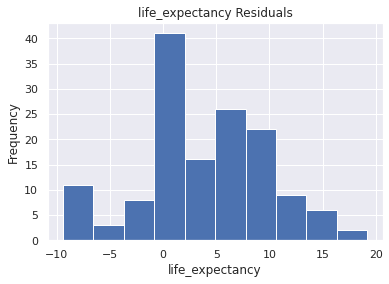

Test statistic = 0.9784954190254211
P-Value = 0.0229799821972847


In [154]:
# Normality Test
NormalityTest(east, central, numeric[1])

* The p-value < 0.05, therefore, there is sufficient evidence to reject the null hypothesis of a normal distribution.
* Non-parametric hypothesis testing will be carried out.

*Non-Parametric*

**Mann Whitney U Test**

In [155]:
# Function call
mannwhitney(east, central)

MannwhitneyuResult(statistic=6938.0, pvalue=6.07494725662674e-07)

The p-value < 0.05, therefore, there is sufficient evidence to reject the null hypothesis of similar distribution between the life expectancy variables of East and North Africa.

In [156]:
moodmedian(east, central)

test_statistic = 24.51063829787234
p_value = 7.390068008379015e-07
grand_median = 58.1
cont_table = 
[[92 49]
 [52 95]]


The p-value < 0.05, therefore, there is sufficient evidence to reject the null hypotheis of equal median life expectancy.

**4. East Vs South**

*Parametic Test*

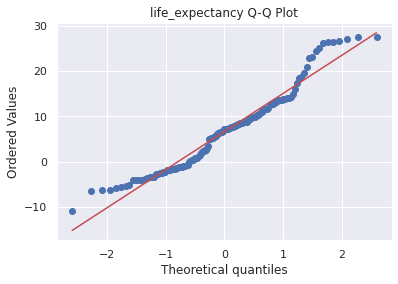

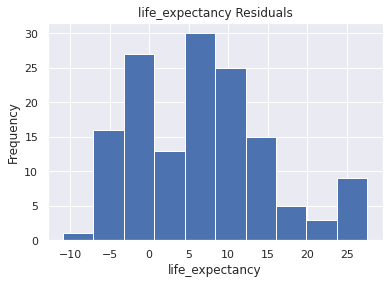

Test statistic = 0.9551688432693481
P-Value = 0.0001272626395802945


In [157]:
# Normality Test
NormalityTest(east, south, numeric[1])

* The p-value < 0.05, therefore there is sufficient evidence to reject the null hypothesis of normal distribution.
* Therefore, non-parametric testing will be carried out.

*Non-Parametric*

**Mann Whitney U Test**

In [158]:
# Function call
mannwhitney(east, south)

MannwhitneyuResult(statistic=4895.5, pvalue=4.830738233450351e-15)

The p-value << 0.05, therefore, there is sufficient evidence to reject the null hypothesis of similar distribution of the life expectancy variable for East and Southern Africa.

**Mood Median**

In [159]:
# Function call
moodmedian(east, south)

test_statistic = 55.125
p_value = 1.1310313266887142e-13
grand_median = 57.349999999999994
cont_table = 
[[104  40]
 [ 40 104]]


The p-value << 0.05, therefore, there is sufficient evidence to reject the null hypothesis of equal life expectancy median between East and Southern Africa.

### Multivariate Analysis

####**1. Label Encoding**

In [160]:
# Categorical columns
cat = list(hypothesis1.select_dtypes(include = 'object').columns)
cat

['country', 'status', 'continent']

In [161]:
# Creating a duplicate dataset
target = hypothesis1.copy()
# Converting categorical columns to numerical columns
label_encoder = preprocessing.LabelEncoder()
# Encoding columns
target[cat]= target[cat].apply(label_encoder.fit_transform)
target.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,bmi,under-five_deaths_,polio,total_expenditure,diphtheria,hiv/aids,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,continent
0,0,2015,1,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1,1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0,1
2,0,2013,1,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9,1
3,0,2012,1,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8,1
4,0,2011,1,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5,1


####**2. Train-Test-Split**

In [162]:
# Splitting data into the training and testing set
X_train = target.loc[target['year'] < 2014].drop(numeric[1], axis = 1)
X_test = target.loc[target['year'] >= 2014].drop(numeric[1], axis = 1)
y_train = target.loc[target['year'] < 2014, numeric[1]]
y_test = target.loc[target['year'] >= 2014, numeric[1]]


# Dataset shapes
print(f'X-train = {len(X_train)}')
print(f'X-test = {len(X_test)}')
print(f'y-train = {len(y_train)}')
print(f'y-test = {len(y_test)}')

X-train = 2258
X-test = 322
y-train = 2258
y-test = 322


####**3. Normalization**

In [163]:
# Numeric columns
numeric2 = numeric.copy()
numeric2.remove('life_expectancy')

In [164]:
# Only scaling the numerical columns
sc = StandardScaler()
X_train[numeric2] = sc.fit_transform(X_train[numeric2])
X_test[numeric2] = sc.transform(X_test[numeric2])

####**4. Dimensionality Reduction**

**PCA**

In [167]:
# Function used to test the accuracy when different number of principle 
# components are used.
def TrainEvaluate(components, xtrain, xtest, ytrain, ytest):
  # Selecting the number of components components
  pca = PCA(n_components= components)
  train = pca.fit_transform(xtrain)
  test = pca.transform(xtest)

  # Explained varianced ratio 
  explained_variance = pca.explained_variance_ratio_

  # Scree plot
  pc_values = np.arange(pca.n_components_) + 1
  plt.plot(pc_values, explained_variance, 'o-', linewidth=2, color='green')
  plt.title('Scree Plot')
  plt.xlabel('Principal Component')
  plt.ylabel('Variance Explained')
  plt.show()

  # Model training
  model = RandomForestRegressor(max_depth=2, random_state=0)
  model.fit(xtrain, ytrain)

  # Prediction
  ypred = model.predict(xtest)

  # Scores
  scores = {'MAE': mean_absolute_error(ytest, ypred),
            'R^2': r2_score(ytest, ypred)}
  print(f'Scores: \n{scores}\n')

  # Comparison
  predictions = pd.DataFrame(data={"actual values": ytest, 
                   "predictions": ypred})
  # Comparisson table
  print(predictions.head(), '\n')






In [168]:
# When all components are used
TrainEvaluate(None, X_train, X_test, y_train, y_test)

NameError: ignored

* The predicted value varies from the true value by 3.0916 (MAE).
* From the r^2 score = 0.7604, therefore, 76% of the data fit the regression model.

In [ ]:
# When one components are used
TrainEvaluate(1, X_train, X_test, y_train, y_test)

* The predicted value varies from the true value by 3.0916 (MAE).
* From the r^2 score = 0.7604, therefore, 76% of the data fit the regression model.

One principle component accounts for most of the variation.

**Feature importance and selection**

In [ ]:
# Random Forest Regressor

model = RandomForestRegressor(random_state = 1, max_depth = 10)
model.fit(X_train, y_train)

In [ ]:
# Feature Importance Graph
features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The income, HIV/AIDS and adult mortality columns have the highest weighted importance.

In [ ]:
# Selecting features based on the importance of their weights
selector = SelectFromModel(model)
selected = selector.fit_transform(X_train, y_train)
selected.shape

In [ ]:
# Mask of selected features
status = selector.get_support()
print("Selection status: ", status) 

# Selected features
features = selector.get_feature_names_out()
print('\n', features)

In [ ]:
# Training set
X_train = pd.DataFrame(selected, columns = selector.get_feature_names_out())
# Preview
X_train.head()

In [ ]:
# Testing set
X_test = X_test.loc[:, features]
# Preview
X_test.head()

In [ ]:
# Model function
def Regression(xtrain, xtest, ytrain, ytest):
  # Model training
  model = RandomForestRegressor(max_depth=2, random_state=0)
  model.fit(xtrain, ytrain)

  # Prediction
  ypred = model.predict(xtest)

  # Scores
  scores = {'MAE': mean_absolute_error(ytest, ypred),
            'MSE': mean_squared_error(ytest, ypred),
            'RMSE': mean_squared_error(ytest, ypred, squared = False),
            'R^2': r2_score(ytest, ypred)}
  print(f'Scores: \n{scores}\n')

  # Comparison
  predictions = pd.DataFrame(data={"actual values": ytest, 
                    "predictions": ypred})
  # Comparisson table
  print(predictions.head(), '\n')


In [ ]:
# Checking performance
Regression( X_train, X_test, y_train, y_test)

* MAE has reduced, however, the r^2 has decreased slightly.

In [ ]:
# Hypaparameter tuning using randimized search

# Hyperparameters to be tested
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Regression model
model = RandomForestRegressor()
rs_model = RandomizedSearchCV(estimator = model,
                            param_distributions=grid,
                            n_iter=100, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

rs_model.fit(X_train, y_train)


In [ ]:
# Best parameters
parameters = rs_model.best_params_
parameters

In [ ]:
# Model function
def Regression(xtrain, xtest, ytrain, ytest):
  # Model training
  model = RandomForestRegressor(max_depth= 10,
 max_features= 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 4,
 n_estimators = 1200)
  model.fit(xtrain, ytrain)

  # Prediction
  ypred = model.predict(xtest)

  # Scores
  scores = {'MAE': mean_absolute_error(ytest, ypred),
            'MSE': mean_squared_error(ytest, ypred),
            'RMSE': mean_squared_error(ytest, ypred, squared = False),
            'R^2': r2_score(ytest, ypred)}
  print(f'Scores: \n{scores}\n')

  # Comparison
  predictions = pd.DataFrame(data={"actual values": ytest, 
                    "predictions": ypred})
  # Comparisson table
  print(predictions.head(), '\n')

  # Plot of actual values vs predictions
  fig, ax = plt.subplots()
  x = np.arange(0, len(predictions), 1)
  ax.scatter(x, predictions["actual values"], c='b', label="Acutual Values",alpha = 0.6)
  ax.scatter(x, predictions["predictions"], c='r', label="Predictions",alpha = 0.6)
  ax.legend(loc=(1, 0.5))
  ax.set_title('Actual Vs Predicted Values', y= 1.05)
  ax.set_ylabel('Y')
  ax.set_xlabel('X')

In [ ]:
# Checking performance
Regression( X_train, X_test, y_train, y_test)

* The MAE has been lowered by two units, therefore, the predicted value has a difference of 1.6182 from the predicted value.
* Furthermore, the fit of the data on the model has improved from 76% to 93%.

##Implementing the solution

What variables are primarily responsible for the difference in life expectancy in different continents and regions?

In [ ]:
# Selected features
features = selector.get_feature_names_out()
print('\n', features)

Adult Mortality, HIV/AIDS and income composition of resources have the greatest effect on life expectancy.

##Challenging the solution

1.Outliers were first removed. This led to a model accuracy 
of 70%.

2.Imputing nan values with the mean of each variables, for each country raised the model accuracy to 76%.

3.Hyperparameter tuning further raised the the Random Forest model accuracy to 93%.

4.The Linear Discriminant Analysis failed (there is a claim that it depends on an underlying Gaussian distribution), therefore, PCA was used to rule out code errors. However, Feature selection and importance was used to identify the most important features, as the datasets contained the label data.

5.Finally, Mood Median non-parametric hypothesis test was used to confirm the results of the Mann Whitney U Test.

##Follow Up Questions

###a). Did we have the right data?

Yes, we have the right data as it has the variables that led to an accuracy of 93% when predicting the result of, and anwering our question.

###b). Do we need other data to answer our question?

Yes, data with fewer missing values will lead to an increase in result accuracy as fewer values will require imputation.

###c). Did we have the right question?

Yes, as the factors identified had a direct effect on the life expectancy in both developed and developing countries.